🎯 **TALLER 1: SERIES DE TIEMPO**

📅 **Fecha:** 2025

👤 **Equipo:** [Hector Hernan Betancourt Lopez - Marcela Fajardo Bermúdez]

#### * Empleando la información del número de ocupados en miles de personas (Ocupados) para las 13 principales ciudades, encuentre el mejor pronóstico para los próximos 6 meses. Escriba un breve informe de máximo una página de texto que explique cómo llega a sus proyeccciones y presente las proyecciones. Aclare en el texto cuáles serían las limitaciones de sus pronósticos.

## **1. Importación de librerias**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose # descomposición de series
from statsmodels.tsa.holtwinters import SimpleExpSmoothing  # Holwinters simple
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Holwinters doble y tripe
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


## **2. Carga de datos y vista rápida**

In [2]:
data = pd.read_excel("C:/Users/mafab/Documents/Fundamentos_Analitica/Series_de_tiempo/datosEmpleo.xlsx",index_col='mes',parse_dates=True)
data.head(3)

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-01-01,20.946380,6923.604,1834.507,4600.718
2001-02-01,19.894213,7037.746,1747.820,4596.805
2001-03-01,19.221565,6945.973,1652.823,4807.120


(222, 4)


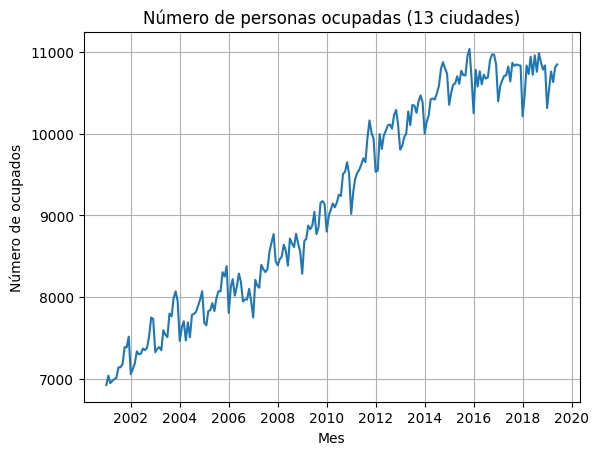

In [3]:
# Dimensiones del dataframe
print(data.shape)

# Graficando los datos
plt.title("Número de personas ocupadas (13 ciudades)")
plt.xlabel("Mes")
plt.ylabel("Número de ocupados")
plt.plot(data[['Ocupados']])
plt.grid()
plt.show()

## **3. Encontrando los componentes de una serie de tiempo**

Se procede a descomponer la serie de tiempo en sus componentes: **tendencia**, **estacionalidad** y **componente puramente aleatorio**.

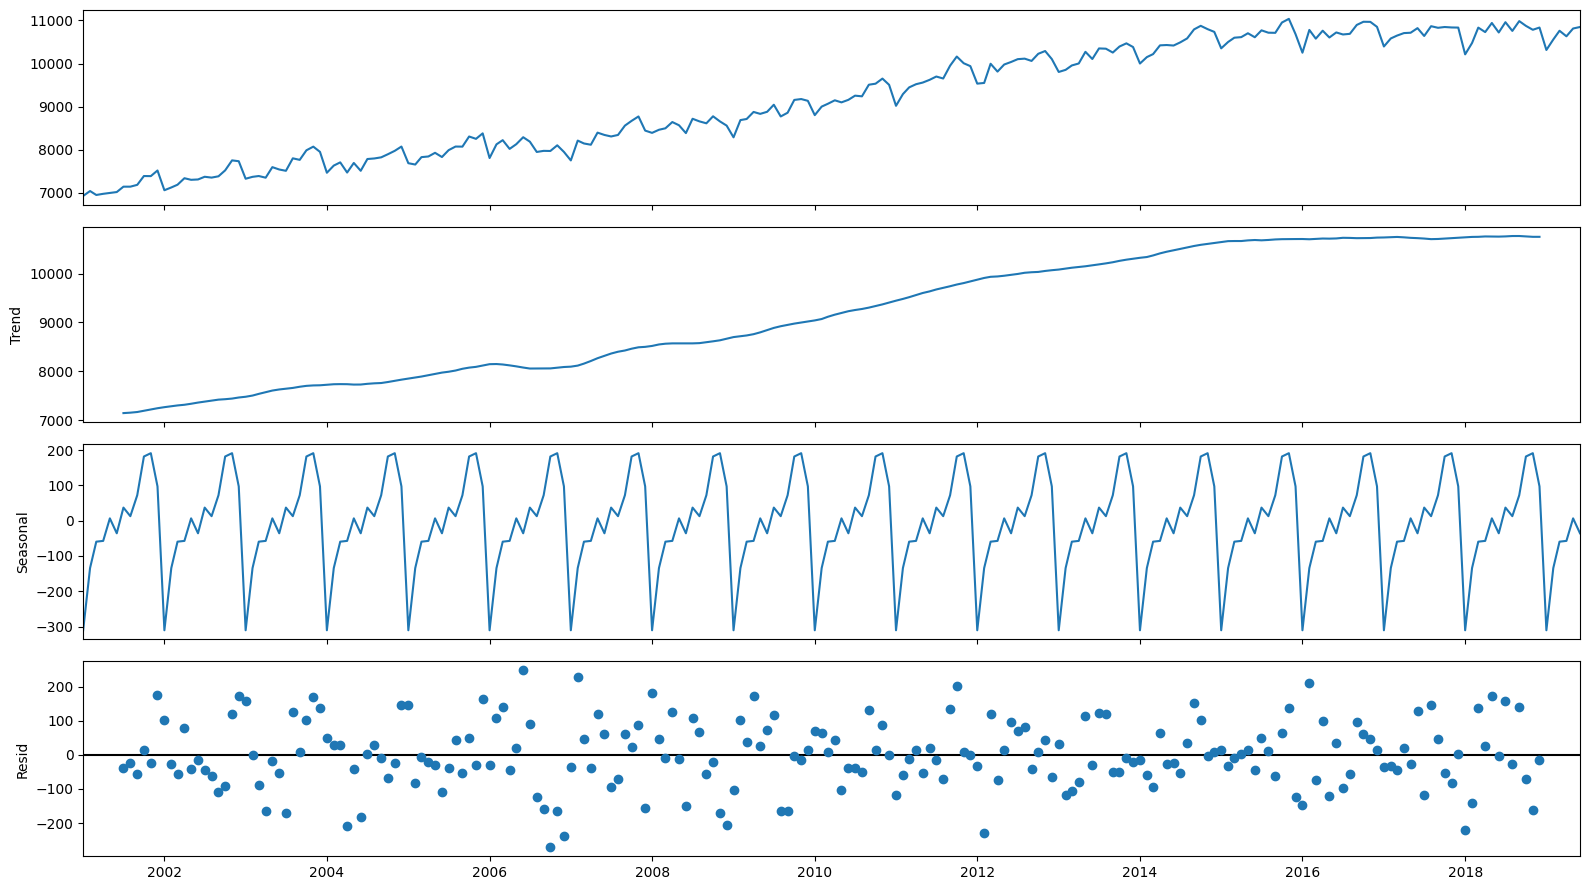

In [4]:
td_componentes = seasonal_decompose(data[["Ocupados"]],model="additive")
fig = td_componentes.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()

Asi se extrae cada elemento de la descomposición de la serie.

In [5]:
td_componentes.seasonal
# td_componentes.trend
# td_componentes.resid

mes
2001-01-01   -310.570069
2001-02-01   -134.331549
2001-03-01    -59.585841
2001-04-01    -57.385905
2001-05-01      6.435912
                 ...    
2019-02-01   -134.331549
2019-03-01    -59.585841
2019-04-01    -57.385905
2019-05-01      6.435912
2019-06-01    -35.859993
Name: seasonal, Length: 222, dtype: float64

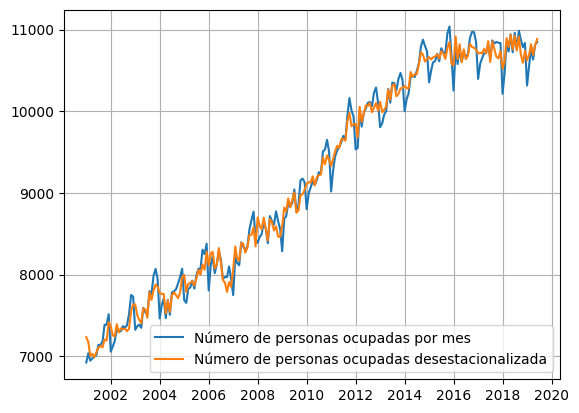

In [6]:
td_desestacionalizada = data['Ocupados']-td_componentes.seasonal

plt.plot(data[['Ocupados']],label="Número de personas ocupadas por mes")
plt.plot(td_desestacionalizada,label="Número de personas ocupadas desestacionalizada")
plt.legend()
plt.grid()
plt.show()


### **4. Pronosticando metodos de suavización**

Antes de continuar es importante guardar una parte de la muestra para evaluar el comportamiento de los modelos por fuera de muestra (out-of-sample). Guardemos un año de datos.

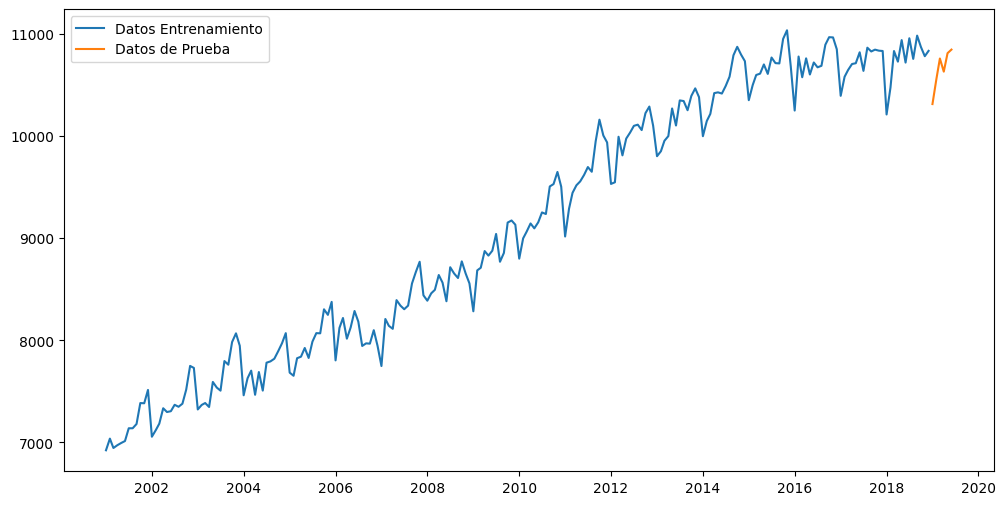

In [7]:
train_len = 216
h = 6
train_td = data[['Ocupados']][:train_len]
test_td = data[['Ocupados']][train_len:train_len+h]

fig = plt.figure(figsize=(12, 6))
plt.plot(train_td,label="Datos Entrenamiento")
plt.plot(test_td,label="Datos de Prueba")
plt.legend()
plt.show()

In [8]:
train_td

,Ocupados
mes,
2001-01-01,6923.604
2001-02-01,7037.746
2001-03-01,6945.973
2001-04-01,6973.079
2001-05-01,6994.462
...,...
2018-08-01,10756.782
2018-09-01,10984.928
2018-10-01,10874.338


In [9]:
test_td

,Ocupados
mes,
2019-01-01,10314.438
2019-02-01,10557.917
2019-03-01,10760.776
2019-04-01,10632.028
2019-05-01,10813.000
2019-06-01,10848.000


## **4.1 Promedio movil**

In [10]:
## Considerando el dato actual
ma_2= train_td.rolling(2,min_periods=2).mean()
ma_3= train_td.rolling(3,min_periods=2).mean()
ma_4= train_td.rolling(4,min_periods=2).mean()
ma_5= train_td.rolling(5,min_periods=2).mean()
ma_6= train_td.rolling(6,min_periods=2).mean()
ma_7= train_td.rolling(7,min_periods=2).mean()

In [11]:
## Sin considerar el dato actual
ma_2= train_td.shift().rolling(2,min_periods=2).mean()
ma_3= train_td.shift().rolling(3,min_periods=2).mean()
ma_4= train_td.shift().rolling(4,min_periods=2).mean()
ma_5= train_td.shift().rolling(5,min_periods=2).mean()
ma_6= train_td.shift().rolling(6,min_periods=2).mean()
ma_7= train_td.shift().rolling(7,min_periods=2).mean()

In [12]:
def fore_ma(datos,w,h):
  data=datos.copy()
  for x in range(1,h+1):
    ind = data.index[-1]
    value = ind + pd.DateOffset(months=1)
    data.loc[value]= data[-w:].mean()
  return data[-h:]

In [13]:
ma_2_f= fore_ma(train_td,2,6)
ma_3_f= fore_ma(train_td,3,6)
ma_4_f= fore_ma(train_td,4,6)
ma_5_f= fore_ma(train_td,5,6)
ma_6_f= fore_ma(train_td,6,6)
ma_7_f= fore_ma(train_td,7,6)

In [14]:
test_td

,Ocupados
mes,
2019-01-01,10314.438
2019-02-01,10557.917
2019-03-01,10760.776
2019-04-01,10632.028
2019-05-01,10813.000
2019-06-01,10848.000


In [15]:
ma_2_f

,Ocupados
mes,
2019-01-01,10809.348500
2019-02-01,10822.373250
2019-03-01,10815.860875
2019-04-01,10819.117063
2019-05-01,10817.488969
2019-06-01,10818.303016


In [16]:
rmse_ma_2 = np.sqrt(mean_squared_error(test_td,ma_2_f ))
rmse_ma_3 = np.sqrt(mean_squared_error(test_td,ma_3_f ))
rmse_ma_4 = np.sqrt(mean_squared_error(test_td,ma_4_f ))
rmse_ma_5 = np.sqrt(mean_squared_error(test_td,ma_5_f ))
rmse_ma_6 = np.sqrt(mean_squared_error(test_td,ma_6_f ))
rmse_ma_7 = np.sqrt(mean_squared_error(test_td,ma_7_f ))

In [17]:
print( rmse_ma_2, rmse_ma_3 ,rmse_ma_4 ,rmse_ma_5, rmse_ma_6, rmse_ma_7)

242.8347290019203 250.36984465630144 270.6203851653251 266.5247179311155 272.83744069293607 269.605171526337


* **Nota:**

El menor error corresponde al modelo de promedio móvil con ventana de 2 meses(rmse_ma_2), ya que significa que el pronóstico tiene, en promedio, menos error respecto a los datos reales del periodo de prueba

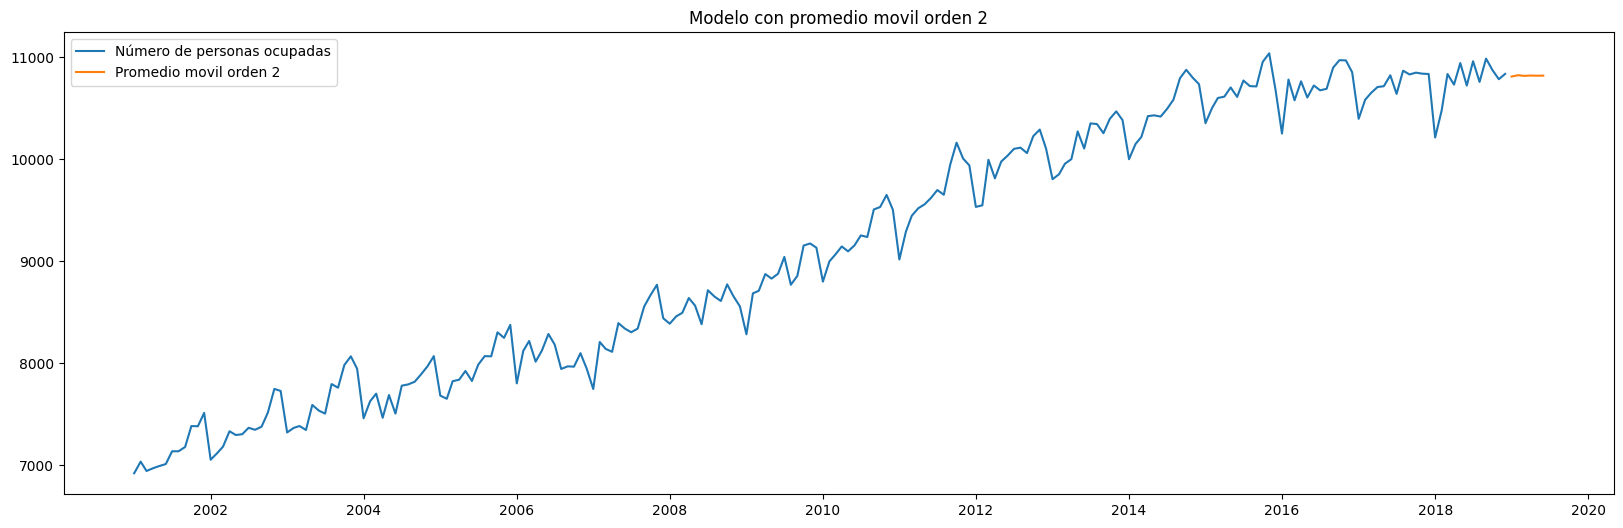

In [18]:
fig = plt.figure(figsize=(20, 6))
plt.plot(train_td,label="Número de personas ocupadas")
plt.plot(ma_2_f,label="Promedio movil orden 2")
plt.legend()
plt.title('Modelo con promedio movil orden 2')
plt.show()

## **4.2 Suavizacion Exponencial Simple**

In [19]:
errors = ["add", "mul"]

results = {}

for error_type in errors:
    ets_model = ETSModel(endog=train_td['Ocupados'], error=error_type)
    ets_result = ets_model.fit()

    point_forecast = ets_result.forecast(6)

    ci = ets_result.get_prediction(start=point_forecast.index[0], end=point_forecast.index[-1])

    conf_forecast = ci.pred_int(alpha=0.05)#.iloc[:,0]
    limits = ci.predicted_mean

    preds = pd.concat([limits, conf_forecast], axis=1)
    preds.columns = ['Point_forecast', 'lower_95', 'upper_95']

    print(f"Resultados para error '{error_type}':")
    print("-"*40)
    print(preds)
    print("-"*40)
    print(f"Alpha: {ets_result.params[0]}")
    print("-"*40)
    rmse = np.sqrt(mean_squared_error(test_td,point_forecast))
    print(f"RMSE: {rmse}")
    print("-"*40)


    results[error_type] = preds

Resultados para error 'add':
----------------------------------------
            Point_forecast      lower_95      upper_95
2019-01-01    10830.738566  10476.461342  11185.015789
2019-02-01    10830.738566  10411.310113  11250.167018
2019-03-01    10830.738566  10354.999034  11306.478098
2019-04-01    10830.738566  10304.681555  11356.795576
2019-05-01    10830.738566  10258.773659  11402.703472
2019-06-01    10830.738566  10216.286184  11445.190948
----------------------------------------
Alpha: 0.6337324797008803
----------------------------------------
RMSE: 253.63725552730503
----------------------------------------
Resultados para error 'mul':
----------------------------------------
            Point_forecast      lower_95      upper_95
2019-01-01    10830.731987  10411.825308  11253.019286
2019-02-01    10830.731987  10359.218240  11342.136100
2019-03-01    10830.731987  10311.622098  11413.797339
2019-04-01    10830.731987  10199.823522  11496.676246
2019-05-01    10830.731987

c:\Users\mafab\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mafab\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


* **NOTA:**

Para este caso es mejor el RMSE del modelo multiplicativo con un α estimado de 0.6339942849598692 Y un RMSE de 253.63

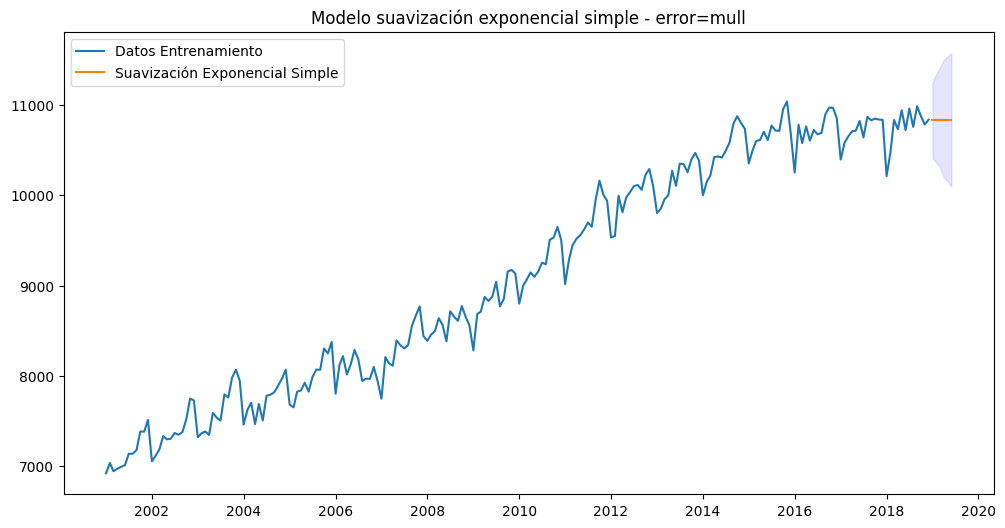

In [20]:
preds_mul = results["mul"]

fig = plt.figure(figsize=(12, 6))
plt.plot(train_td,label="Datos Entrenamiento")
plt.plot(preds_mul['Point_forecast'],label="Suavización Exponencial Simple")
plt.fill_between(preds_mul.index ,preds_mul['lower_95'], preds_mul['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.title("Modelo suavización exponencial simple - error=mull")
plt.show()

## **4.3 Suavizacion Exponencial Lineal (Holt)**

In [21]:
errors = ["add", "mul"]
trend = ["add", "mul", None]

results_holt = {}

for error_type in errors:
  for trend_type in trend:
    ets_model = ETSModel(endog=train_td['Ocupados'], error=error_type, trend=trend_type)
    ets_result = ets_model.fit()

    point_forecast = ets_result.forecast(6)

    ci = ets_result.get_prediction(start=point_forecast.index[0], end=point_forecast.index[-1])

    conf_forecast = ci.pred_int(alpha=0.05)#.iloc[:,0]
    limits = ci.predicted_mean

    preds_holt = pd.concat([limits, conf_forecast], axis=1)
    preds_holt.columns = ['Point_forecast', 'lower_95', 'upper_95']

    print(f"Resultados para error={error_type}, trend={trend_type}:")
    print("-"*40)
    print(preds_holt)
    print("-"*40)
    print(f"Alpha (Nivel): {ets_result.alpha}")
    if trend_type is not None:
            print(f"Beta (Tendencia): {ets_result.beta}")
    print("-"*40)
    rmse_holt = np.sqrt(mean_squared_error(test_td,preds_holt['Point_forecast']))
    print(f"RMSE_HOLT: {rmse_holt}")
    print("-"*40)


    key = f"error_{error_type}, trend_{trend_type}"
    results_holt[key] = preds_holt

c:\Users\mafab\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mafab\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mafab\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mafab\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Resultados para error=add, trend=add:
----------------------------------------
            Point_forecast      lower_95      upper_95
2019-01-01    10862.758902  10510.444669  11215.073135
2019-02-01    10879.826713  10472.720466  11286.932959
2019-03-01    10896.894523  10440.526942  11353.262105
2019-04-01    10913.962334  10412.222238  11415.702431
2019-05-01    10931.030145  10386.823435  11475.236856
2019-06-01    10948.097956  10363.687987  11532.507925
----------------------------------------
Alpha (Nivel): 0.5725831273639476
Beta (Tendencia): 0.006404913661153879
----------------------------------------
RMSE_HOLT: 296.15525530922946
----------------------------------------
Resultados para error=add, trend=mul:
----------------------------------------
            Point_forecast      lower_95      upper_95
2019-01-01    10870.463436  10539.435202  11197.758806
2019-02-01    10890.832398  10491.624600  11284.296083
2019-03-01    10911.239526  10475.180362  11367.756609
2019-04-01 

c:\Users\mafab\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mafab\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


* **NOTA:**

El modelo de suavización exponencial lineal (Holt) con error=mul y trend=None, fue el de mejor RMSE con 253.63268060657933. En este caso el α estimado es 0.6339942849598692.

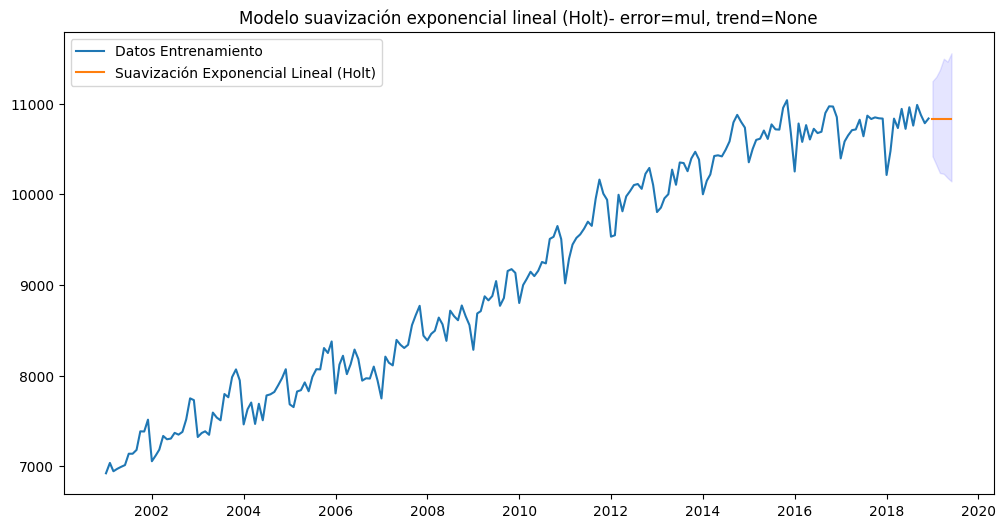

In [22]:
preds_mejor = results_holt['error_mul, trend_None']

fig = plt.figure(figsize=(12, 6))
plt.plot(train_td,label="Datos Entrenamiento")
plt.plot(preds_mejor['Point_forecast'],label="Suavización Exponencial Lineal (Holt)")
plt.fill_between(preds_mejor.index ,preds_mejor['lower_95'], preds_mejor['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.title('Modelo suavización exponencial lineal (Holt)- error=mul, trend=None')
plt.show()

## **4.3 Suavizacion Exponencial Lineal de Winters (Holt-Winters)**

In [23]:
errors = ["add", "mul"]
trend = ["add", "mul", None]
seasonal = ["add", "mul"]

results_HW = {}

for error_type in errors:
  for trend_type in trend:
    for seasonal_type in seasonal:
      # Skip multiplicative seasonal model if data contains non-positive values
      if seasonal_type == "mul" and (train_td['Ocupados'] <= 0).any():
          print(f"Skipping model with error={error_type}, trend={trend_type}, seasonal={seasonal_type} due to non-positive data.")
          continue

      ets_model = ETSModel(endog=train_td['Ocupados'], error=error_type, trend=trend_type, seasonal=seasonal_type)
      ets_result = ets_model.fit()

      point_forecast = ets_result.forecast(6)

      ci = ets_result.get_prediction(start=point_forecast.index[0], end=point_forecast.index[-1])

      conf_forecast = ci.pred_int(alpha=0.05)#.iloc[:,0]
      limits = ci.predicted_mean

      preds_HW = pd.concat([limits, conf_forecast], axis=1)
      preds_HW.columns = ['Point_forecast', 'lower_95', 'upper_95']

      print(f"Resultados para error={error_type}, trend={trend_type}, seasonal={seasonal_type}:")
      print("-"*40)
      print(preds_HW)
      print("-"*40)
      print(f"Alpha (Nivel): {ets_result.alpha}")
      if trend_type is not None:
            print(f"Beta (Tendencia): {ets_result.beta}")
      print(f"Gamma (Estacionalidad): {ets_result.gamma}")
      print("-"*40)
      rmse_HW = np.sqrt(mean_squared_error(test_td,preds_HW['Point_forecast']))
      print(f"RMSE_HW: {rmse_HW}")
      print("-"*40)


      key = f"error_{error_type}, trend_{trend_type}, seasonal_{seasonal_type}"
      results_HW[key] = preds_HW

c:\Users\mafab\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Resultados para error=add, trend=add, seasonal=add:
----------------------------------------
            Point_forecast      lower_95      upper_95
2019-01-01    10349.066094  10090.566259  10607.565928
2019-02-01    10624.669899  10350.514445  10898.825354
2019-03-01    10770.096090  10481.129086  11059.063093
2019-04-01    10786.237896  10483.179629  11089.296163
2019-05-01    10870.805531  10554.280073  11187.330989
2019-06-01    10828.745263  10499.300145  11158.190381
----------------------------------------
Alpha (Nivel): 0.3532275373351325
Beta (Tendencia): 3.532275373351325e-05
Gamma (Estacionalidad): 0.2970519514975667
----------------------------------------
RMSE_HW: 74.42539315021223
----------------------------------------
Resultados para error=add, trend=add, seasonal=mul:
----------------------------------------
            Point_forecast      lower_95      upper_95
2019-01-01    10369.543530  10150.157171  10579.617732
2019-02-01    10586.711583  10338.572327  10843.0136

c:\Users\mafab\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mafab\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Resultados para error=add, trend=mul, seasonal=add:
----------------------------------------
            Point_forecast      lower_95      upper_95
2019-01-01    10332.377149  10031.468508  10642.279578
2019-02-01    10616.453369  10297.655775  10911.956771
2019-03-01    10769.121512  10416.091340  11106.305196
2019-04-01    10770.411323  10376.219010  11161.482928
2019-05-01    10863.326141  10471.660304  11266.855833
2019-06-01    10815.927524  10380.721753  11209.633187
----------------------------------------
Alpha (Nivel): 0.4075937121247438
Beta (Tendencia): 4.075937121247438e-05
Gamma (Estacionalidad): 0.3341309219169946
----------------------------------------
RMSE_HW: 66.49470566265785
----------------------------------------


c:\Users\mafab\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Resultados para error=add, trend=mul, seasonal=mul:
----------------------------------------
            Point_forecast      lower_95      upper_95
2019-01-01    10367.422831  10146.185372  10586.895416
2019-02-01    10585.328713  10327.431007  10855.522467
2019-03-01    10687.307289  10404.392386  10961.004480
2019-04-01    10715.020098  10415.763307  11026.985376
2019-05-01    10802.091088  10489.543732  11143.570556
2019-06-01    10775.733097  10453.167946  11125.312660
----------------------------------------
Alpha (Nivel): 0.5253403923132627
Beta (Tendencia): 5.253403923132627e-05
Gamma (Estacionalidad): 4.746596076867373e-05
----------------------------------------
RMSE_HW: 59.4217184356385
----------------------------------------
Resultados para error=add, trend=None, seasonal=add:
----------------------------------------
            Point_forecast      lower_95      upper_95
2019-01-01    10387.236901  10128.740547  10645.733254
2019-02-01    10636.934808  10339.997296  10933.8

c:\Users\mafab\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mafab\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Resultados para error=add, trend=None, seasonal=mul:
----------------------------------------
            Point_forecast      lower_95      upper_95
2019-01-01    10325.781771  10100.767667  10584.300391
2019-02-01    10527.749195  10258.752099  10793.340281
2019-03-01    10611.310492  10312.351844  10908.133610
2019-04-01    10620.935074  10290.827507  10965.614111
2019-05-01    10689.617894  10330.808252  11052.475899
2019-06-01    10645.660941  10256.222654  11013.969271
----------------------------------------
Alpha (Nivel): 0.5975177329815669
Gamma (Estacionalidad): 4.024822670184332e-05
----------------------------------------
RMSE_HW: 115.22876353569147
----------------------------------------


c:\Users\mafab\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Resultados para error=mul, trend=add, seasonal=add:
----------------------------------------
            Point_forecast      lower_95      upper_95
2019-01-01    10342.943207  10062.397375  10636.796737
2019-02-01    10621.399544  10296.771411  10961.853096
2019-03-01    10768.397425  10392.814130  11126.344308
2019-04-01    10785.085707  10397.512912  11167.578267
2019-05-01    10871.922141  10480.900524  11237.053352
2019-06-01    10830.743456  10447.125043  11241.539698
----------------------------------------
Alpha (Nivel): 0.3761915609574163
Beta (Tendencia): 3.761915609574163e-05
Gamma (Estacionalidad): 0.2963569623784584
----------------------------------------
RMSE_HW: 73.14020212089368
----------------------------------------
Resultados para error=mul, trend=add, seasonal=mul:
----------------------------------------
            Point_forecast      lower_95      upper_95
2019-01-01    10367.819878  10119.711158  10634.960463
2019-02-01    10581.945911  10275.074939  10885.1244

c:\Users\mafab\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mafab\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Resultados para error=mul, trend=mul, seasonal=add:
----------------------------------------
            Point_forecast      lower_95      upper_95
2019-01-01    10322.596445   9928.406618  10738.136474
2019-02-01    10616.650778  10216.830762  11003.900733
2019-03-01    10777.612659  10308.917489  11223.911375
2019-04-01    10771.703807  10262.123039  11260.120938
2019-05-01    10874.744016  10367.809279  11390.530732
2019-06-01    10826.826195  10256.476839  11332.337406
----------------------------------------
Alpha (Nivel): 0.4580172886295111
Beta (Tendencia): 4.580172886295111e-05
Gamma (Estacionalidad): 0.35256497507229
----------------------------------------
RMSE_HW: 67.78602899164966
----------------------------------------


c:\Users\mafab\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Resultados para error=mul, trend=mul, seasonal=mul:
----------------------------------------
            Point_forecast      lower_95      upper_95
2019-01-01    10365.848566  10092.927525  10617.395559
2019-02-01    10580.182587  10281.167595  10880.680250
2019-03-01    10671.922741  10347.970623  11026.671443
2019-04-01    10692.203752  10306.956079  11068.883867
2019-05-01    10787.405460  10365.181864  11203.618199
2019-06-01    10757.325085  10314.967097  11190.479906
----------------------------------------
Alpha (Nivel): 0.5558995347985952
Beta (Tendencia): 5.5589953479859526e-05
Gamma (Estacionalidad): 4.441004652014048e-05
----------------------------------------
RMSE_HW: 62.625668223155955
----------------------------------------
Resultados para error=mul, trend=None, seasonal=add:
----------------------------------------
            Point_forecast      lower_95      upper_95
2019-01-01    10266.093664   9929.891411  10579.165323
2019-02-01    10540.005351  10190.988004  1092

c:\Users\mafab\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mafab\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Resultados para error=mul, trend=None, seasonal=mul:
----------------------------------------
            Point_forecast      lower_95      upper_95
2019-01-01    10324.802659  10045.909039  10583.585386
2019-02-01    10522.820820  10193.926329  10859.933751
2019-03-01    10595.189848  10235.993138  10967.047855
2019-04-01    10596.271220  10207.998605  11040.932143
2019-05-01    10671.635676  10253.723218  11121.595603
2019-06-01    10622.715658  10180.841994  11124.528025
----------------------------------------
Alpha (Nivel): 0.6251105945155492
Gamma (Estacionalidad): 3.748894054844508e-05
----------------------------------------
RMSE_HW: 129.59770821914475
----------------------------------------


* **NOTA:**

El modelo de suavización exponencial lineal (Holt) con error=ad, trend=mul y seasonal=mul, fue el de mejor RMSE con 59.423908846598934. En este caso el α estimado es 0.525353314736116, el β estimado es 5.2535331473611604e-05 y el Gamma es 4.74646685263884e-05.

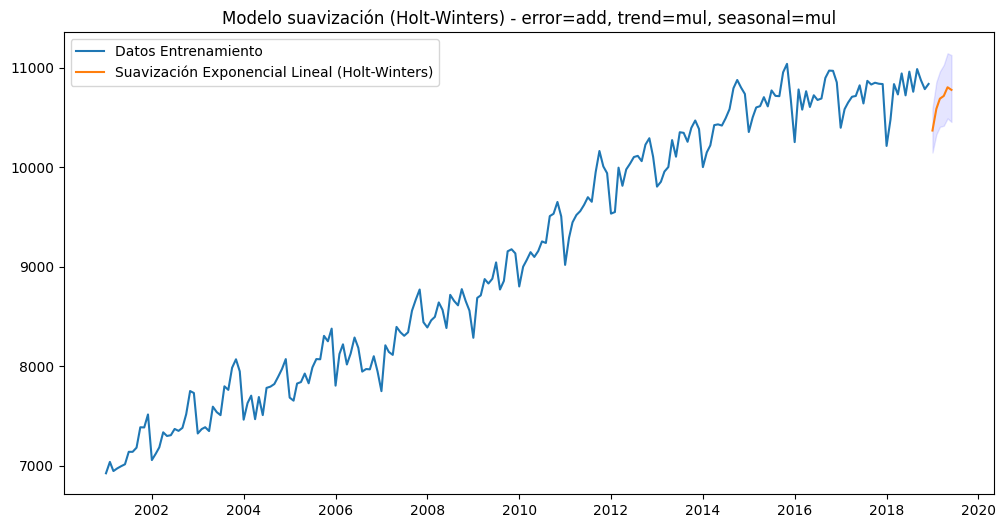

In [24]:
mejor_hw = results_HW['error_add, trend_mul, seasonal_mul']

fig = plt.figure(figsize=(12, 6))
plt.plot(train_td,label="Datos Entrenamiento")
plt.plot(mejor_hw['Point_forecast'],label="Suavización Exponencial Lineal (Holt-Winters)")
plt.fill_between(mejor_hw.index ,mejor_hw['lower_95'], mejor_hw['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.title('Modelo suavización (Holt-Winters) - error=add, trend=mul, seasonal=mul')
plt.show()

## **5. Comparación de modelos**

In [25]:
Resultados_RMSE = {
    'Promedio Móvil (w=2)': rmse_ma_2,
    'Promedio Móvil (w=3)': rmse_ma_3,
    'Promedio Móvil (w=4)': rmse_ma_4,
    'Promedio Móvil (w=5)': rmse_ma_5,
    'Promedio Móvil (w=6)': rmse_ma_6,
    'Promedio Móvil (w=7)': rmse_ma_7,
    'Suavización Exponencial Simple (additive)': np.sqrt(mean_squared_error(test_td, results['add']['Point_forecast'])),
    'Suavización Exponencial Simple (multiplicative)': np.sqrt(mean_squared_error(test_td, results['mul']['Point_forecast'])),
    'Holt (error=add, trend=add)': np.sqrt(mean_squared_error(test_td, results_holt['error_add, trend_add']['Point_forecast'])),
    'Holt (error=add, trend=mul)': np.sqrt(mean_squared_error(test_td, results_holt['error_add, trend_mul']['Point_forecast'])),
    'Holt (error=mul, trend=add)': np.sqrt(mean_squared_error(test_td, results_holt['error_mul, trend_add']['Point_forecast'])),
    'Holt (error=mul, trend=mul)': np.sqrt(mean_squared_error(test_td, results_holt['error_mul, trend_mul']['Point_forecast'])),
    'Holt-Winters (error=add, trend=add, seasonal=add)': np.sqrt(mean_squared_error(test_td, results_HW['error_add, trend_add, seasonal_add']['Point_forecast'])),
    'Holt-Winters (error=add, trend=add, seasonal=mul)': np.sqrt(mean_squared_error(test_td, results_HW['error_add, trend_add, seasonal_mul']['Point_forecast'])),
    'Holt-Winters (error=add, trend=mul, seasonal=add)': np.sqrt(mean_squared_error(test_td, results_HW['error_add, trend_mul, seasonal_add']['Point_forecast'])),
    'Holt-Winters (error=add, trend=mul, seasonal=mul)': np.sqrt(mean_squared_error(test_td, results_HW['error_add, trend_mul, seasonal_mul']['Point_forecast'])),
    'Holt-Winters (error=mul, trend=add, seasonal=add)': np.sqrt(mean_squared_error(test_td, results_HW['error_mul, trend_add, seasonal_add']['Point_forecast'])),
    'Holt-Winters (error=mul, trend=add, seasonal=mul)': np.sqrt(mean_squared_error(test_td, results_HW['error_mul, trend_add, seasonal_mul']['Point_forecast'])),
    'Holt-Winters (error=mul, trend=mul, seasonal=add)': np.sqrt(mean_squared_error(test_td, results_HW['error_mul, trend_mul, seasonal_add']['Point_forecast'])),
    'Holt-Winters (error=mul, trend=mul, seasonal=mul)': np.sqrt(mean_squared_error(test_td, results_HW['error_mul, trend_mul, seasonal_mul']['Point_forecast'])),
    'Holt-Winters (error=add, trend=None, seasonal=add)': np.sqrt(mean_squared_error(test_td, results_HW['error_add, trend_None, seasonal_add']['Point_forecast'])),
    'Holt-Winters (error=add, trend=None, seasonal=mul)': np.sqrt(mean_squared_error(test_td, results_HW['error_add, trend_None, seasonal_mul']['Point_forecast'])),
    'Holt-Winters (error=mul, trend=None, seasonal=add)': np.sqrt(mean_squared_error(test_td, results_HW['error_mul, trend_None, seasonal_add']['Point_forecast'])),
    'Holt-Winters (error=mul, trend=None, seasonal=mul)': np.sqrt(mean_squared_error(test_td, results_HW['error_mul, trend_None, seasonal_mul']['Point_forecast'])),
    'Holt (error=add, trend=None)': np.sqrt(mean_squared_error(test_td, results_holt['error_add, trend_None']['Point_forecast'])),
    'Holt (error=mul, trend=None)': np.sqrt(mean_squared_error(test_td, results_holt['error_mul, trend_None']['Point_forecast'])),

}

# Create a DataFrame from the dictionary

Comparativo_RMSE = pd.DataFrame.from_dict(Resultados_RMSE, orient='index', columns=['RMSE'])

# Sort the DataFrame by RMSE
Comparativo_RMSE = Comparativo_RMSE.sort_values(by='RMSE')

# Add a 'Modelo' column from the index
Comparativo_RMSE.insert(0, 'Modelo', Comparativo_RMSE.index)

# Reset the index to remove the original index
Comparativo_RMSE = Comparativo_RMSE.reset_index(drop=True)

print("\nTabla comparativa de RMSE de los modelos:")
display(Comparativo_RMSE)


Tabla comparativa de RMSE de los modelos:


,Modelo,RMSE
0,"Holt-Winters (error=add, trend=mul, seasonal=mul)",59.421718
1,"Holt-Winters (error=add, trend=add, seasonal=mul)",59.639330
2,"Holt-Winters (error=mul, trend=add, seasonal=mul)",61.988466
3,"Holt-Winters (error=mul, trend=mul, seasonal=mul)",62.625668
4,"Holt-Winters (error=add, trend=mul, seasonal=add)",66.494706
5,"Holt-Winters (error=mul, trend=mul, seasonal=add)",67.786029
6,"Holt-Winters (error=mul, trend=add, seasonal=add)",73.140202
7,"Holt-Winters (error=add, trend=add, seasonal=add)",74.425393
8,"Holt-Winters (error=mul, trend=None, seasonal=...",80.837655
9,"Holt-Winters (error=add, trend=None, seasonal=...",83.943233


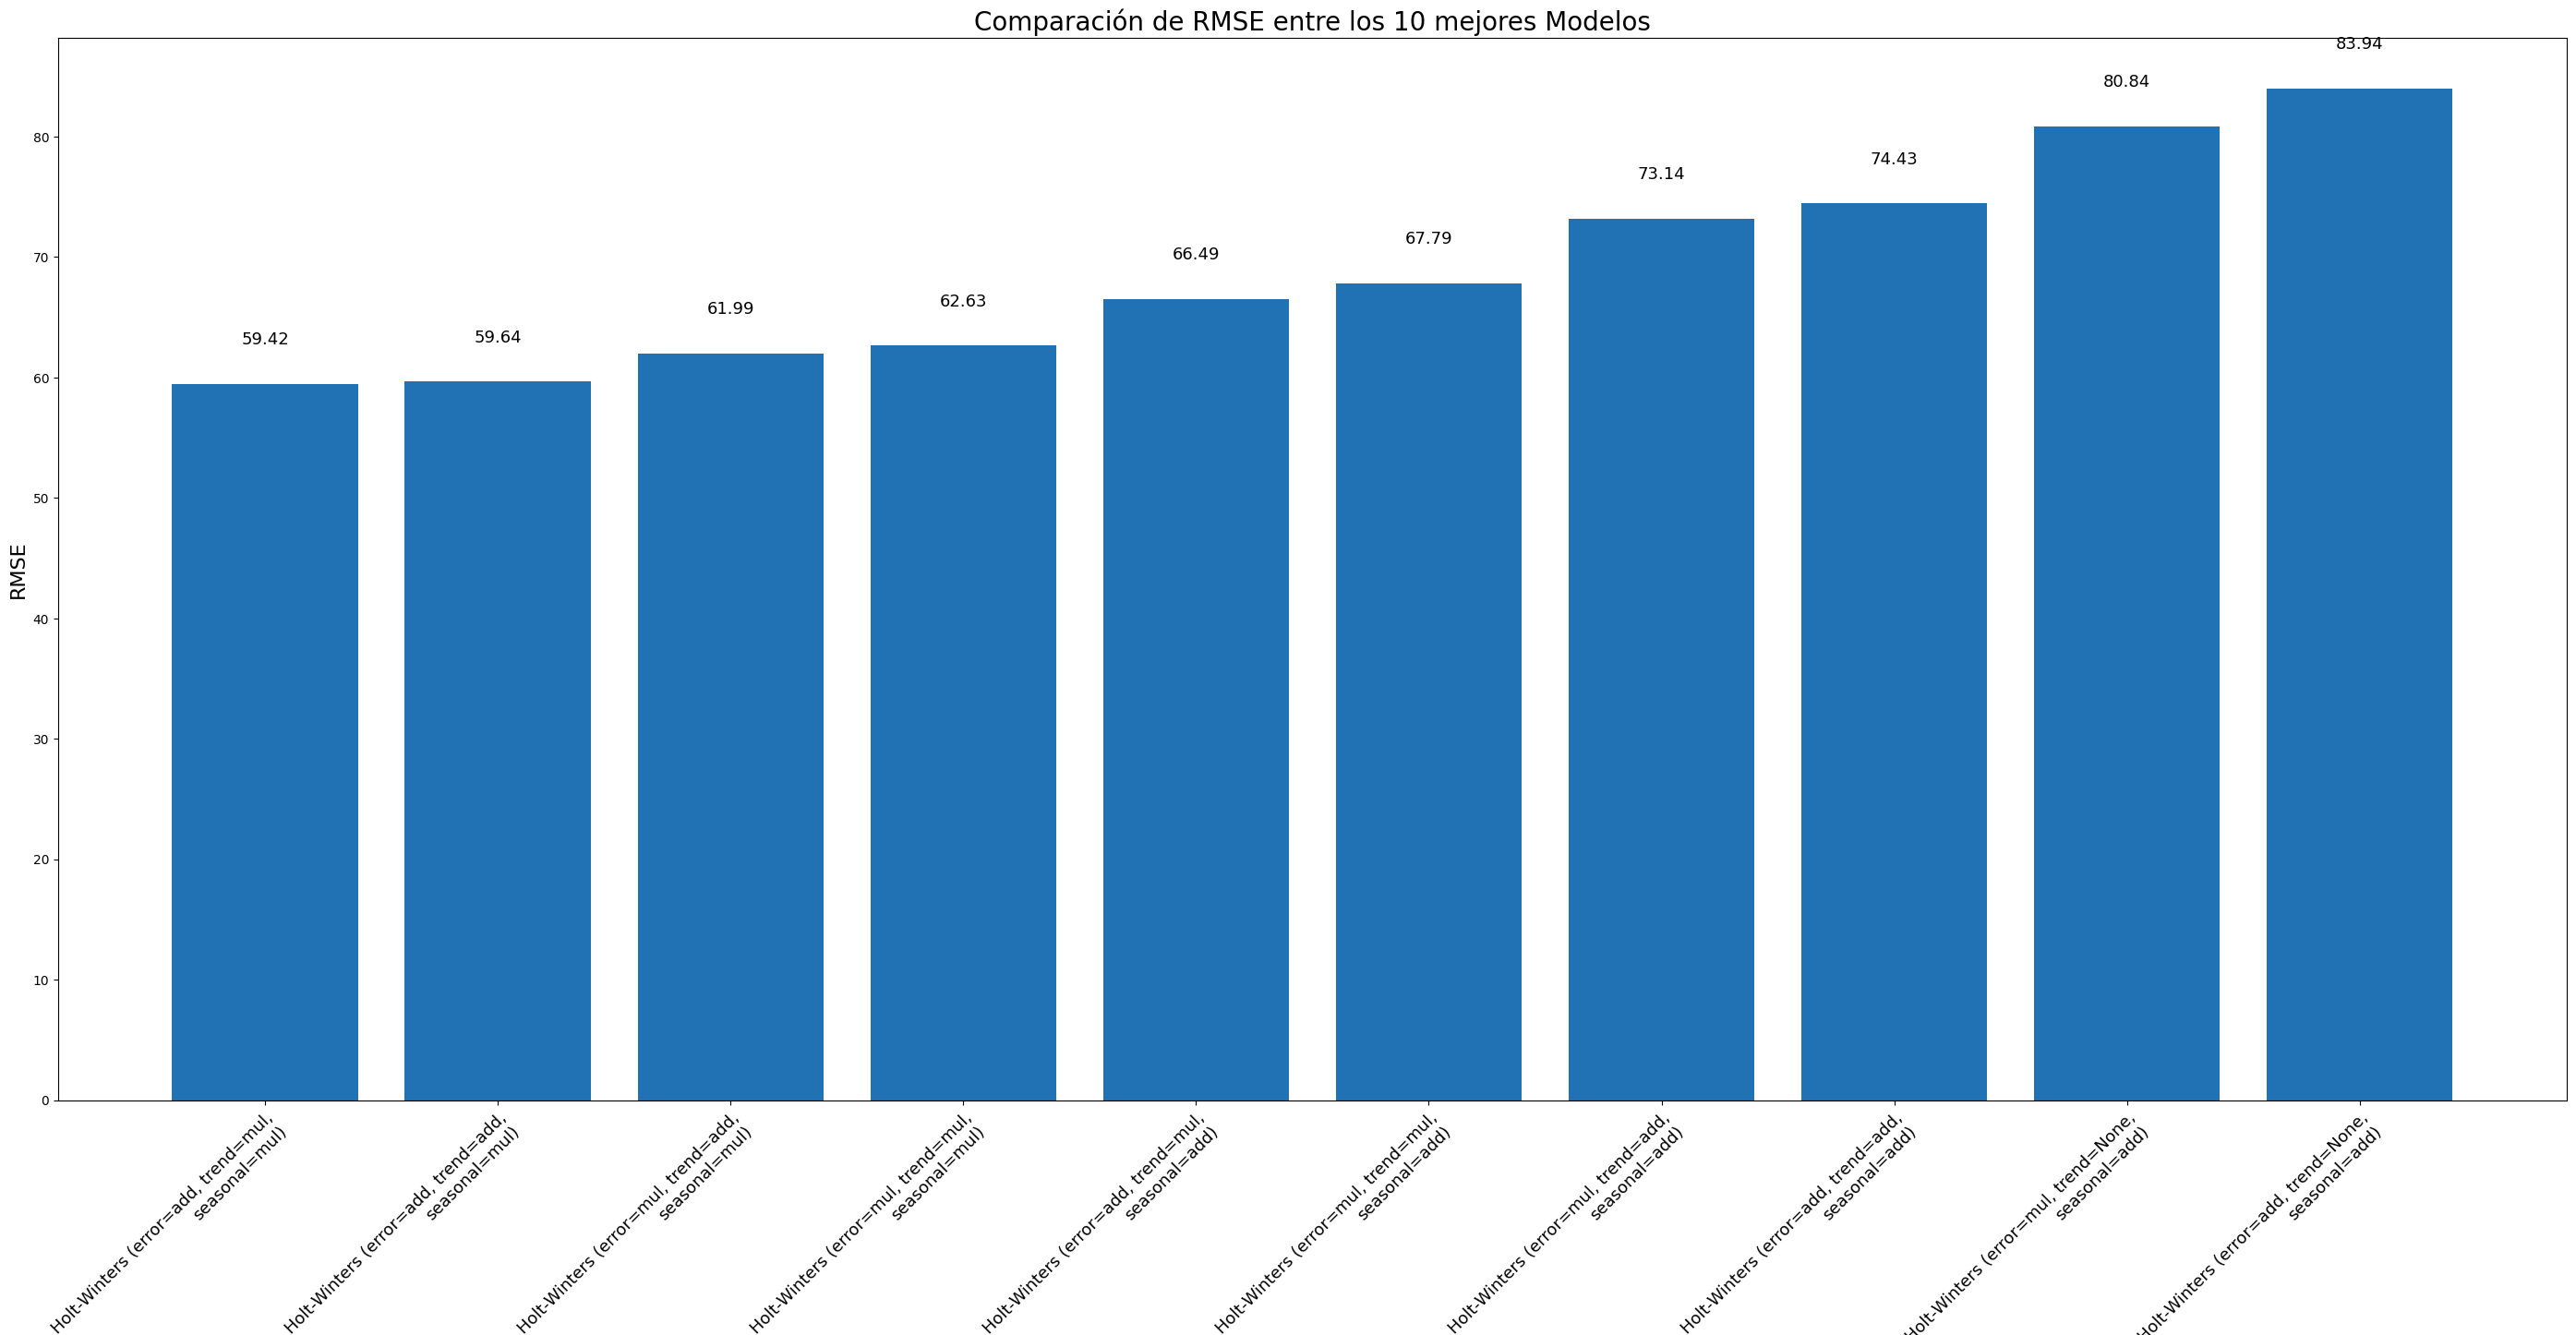

In [26]:
plt.figure(figsize=(28, 14))
# Select the top 10 models based on RMSE
top_10_models = Comparativo_RMSE.head(10)

bars = plt.bar(top_10_models['Modelo'], top_10_models['RMSE'], color='#2171b5')

# Mejor rotación y alineación, fuente grande
plt.xticks(rotation=45, ha='right', fontsize=13, wrap=True)

plt.xlabel("Modelo", fontsize=16)
plt.ylabel("RMSE", fontsize=16)
plt.title("Comparación de RMSE entre los 10 mejores Modelos", fontsize=20)

# Etiquetas numéricas encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 3,
             f'{yval:.2f}', ha='center', va='bottom', fontsize=13)

plt.tight_layout()
plt.show()

c:\Users\mafab\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


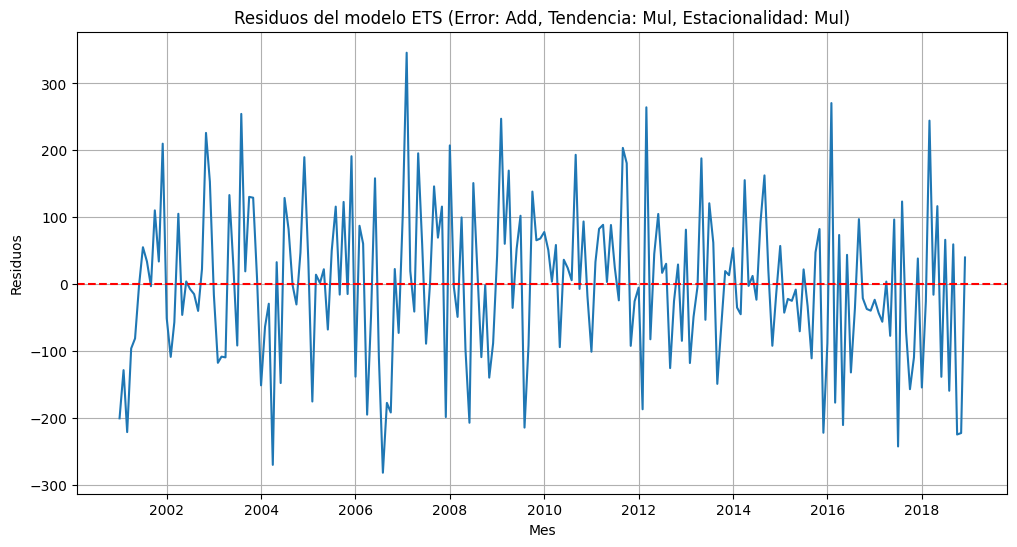

In [27]:
ets_best_model = ETSModel(endog=train_td["Ocupados"], error="add", trend="mul", seasonal="mul", seasonal_periods=12)
ets_best_result = ets_best_model.fit()

fitted_values = ets_best_result.fittedvalues

# Calcular los residuos (diferencia entre los valores reales y los ajustados)
residuals = train_td["Ocupados"] - fitted_values

# Graficar los residuos
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.axhline(0, color='red', linestyle='--') # Línea de referencia en cero
plt.title("Residuos del modelo ETS (Error: Add, Tendencia: Mul, Estacionalidad: Mul)")
plt.xlabel("Mes")
plt.ylabel("Residuos")
plt.grid(True)
plt.show()

* **Nota:**

En este gráfico se observa que los residuos obtenidos del mejor modelo, es decir aquel con menor RMSE, permanecen alrededor de la línea de cero y presentan una varianza constante. Es decir, el modelo seleccionado permite capturar la relación entre la variable objetivo y las predictoras.

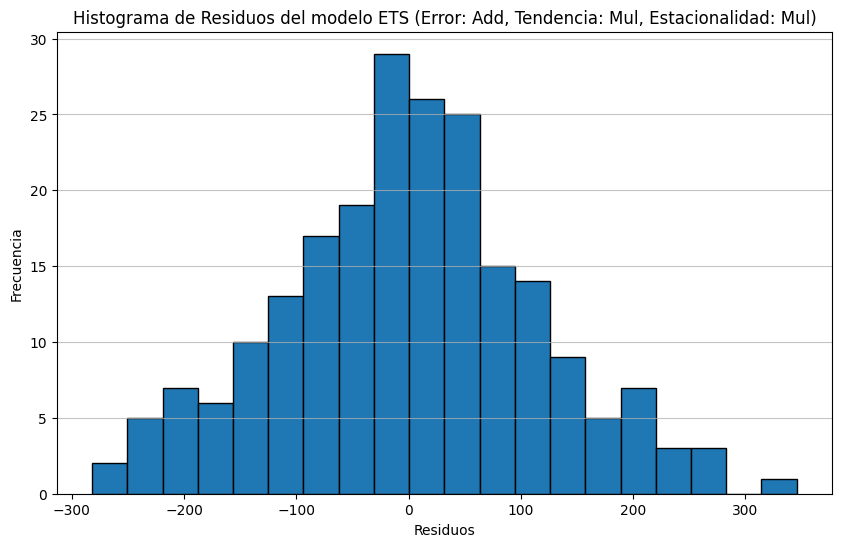

In [28]:
# Crear un histograma de los residuos

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title("Histograma de Residuos del modelo ETS (Error: Add, Tendencia: Mul, Estacionalidad: Mul)")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.grid(axis='y', alpha=0.75)
plt.show()

* **Nota:**

El gráfico de histograma  muestra una distribución simétrica y normal, es decir que los errores del modelo se distribuyen de manera homogénea.

## **6. Suavización Exponencial All Data**

### Se ajusta el modelo con el train y se observan los hiperparametros obtenidos en la optimización

In [29]:
ets_model = ETSModel(endog=train_td['Ocupados'],error="add",trend="mul",seasonal="mul")
ets_result = ets_model.fit()

c:\Users\mafab\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [30]:
## Se obtienen los hiperparametros

print(f"Alpha (Nivel): {ets_result.alpha}")
print(f"Beta (Tendencia): {ets_result.beta}")
print(f"Gamma (Estacionalidad): {ets_result.gamma}")
print(f"Param names: {ets_result.param_names}")

Alpha (Nivel): 0.5253403923132627
Beta (Tendencia): 5.253403923132627e-05
Gamma (Estacionalidad): 4.746596076867373e-05
Param names: ['smoothing_level', 'smoothing_trend', 'smoothing_seasonal', 'initial_level', 'initial_trend', 'initial_seasonal.0', 'initial_seasonal.1', 'initial_seasonal.2', 'initial_seasonal.3', 'initial_seasonal.4', 'initial_seasonal.5', 'initial_seasonal.6', 'initial_seasonal.7', 'initial_seasonal.8', 'initial_seasonal.9', 'initial_seasonal.10', 'initial_seasonal.11']


In [31]:
## Ahora se ajusta el modelo final con todos los datos

final_model = ETSModel(endog=data['Ocupados'],error="add",trend="mul",seasonal="mul")
final_model_fit = final_model.fit_constrained({'smoothing_level': 0.525353314736116,'smoothing_trend': 5.2535331473611604e-05,'smoothing_seasonal':4.74646685263884e-05})

print(final_model_fit.alpha)
print(final_model_fit.beta)
print(final_model_fit.gamma)

0.525353314736116
5.2535331473611604e-05
4.74646685263884e-05


c:\Users\mafab\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [32]:
point_forecast=final_model_fit.forecast(6)

ci = final_model_fit.get_prediction(start = point_forecast.index[0],
                                end = point_forecast.index[-1])

conf_forecast = ci.pred_int(alpha=0.05)#.iloc[:,0]
limits = ci.predicted_mean


preds_hw_add = pd.concat([limits, conf_forecast], axis = 1)
preds_hw_add.columns = ['Point_forecast', 'lower_95', 'upper_95']
print(preds_hw_add)

            Point_forecast      lower_95      upper_95
2019-07-01    10915.692986  10680.560774  11129.086677
2019-08-01    10904.066111  10675.663538  11135.696342
2019-09-01    10997.718019  10716.806697  11274.318055
2019-10-01    11140.584055  10847.821121  11422.160316
2019-11-01    11165.790190  10863.415650  11480.296943
2019-12-01    11070.066575  10739.621514  11414.512469


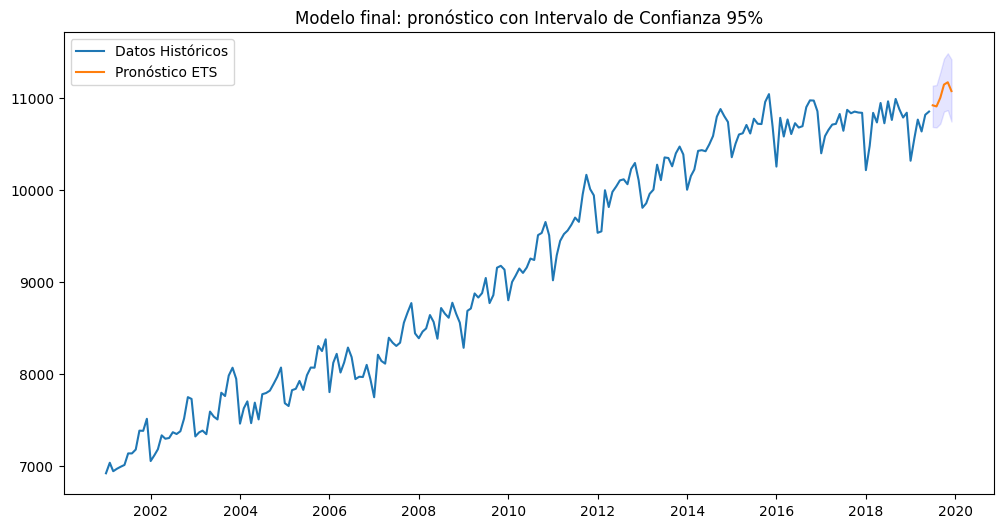

In [33]:
fig = plt.figure(figsize=(12, 6))

# Serie histórica completa de Ocupados
plt.plot(data.index, data['Ocupados'], label="Datos Históricos")

# Pronóstico puntual (6 meses)
plt.plot(preds_hw_add.index, preds_hw_add['Point_forecast'], label="Pronóstico ETS")

# Intervalo de confianza 95%
plt.fill_between(preds_hw_add.index,
                 preds_hw_add['lower_95'],
                 preds_hw_add['upper_95'],
                 color='blue', alpha=0.1)

plt.legend()
plt.title('Modelo final: pronóstico con Intervalo de Confianza 95%')
plt.show()